### Cell 1: Import libraries and load files

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load model 1 predictions (diagnosis)
model1_pred = pd.read_csv('../models/model1_pred.csv')
model1_prob = pd.read_csv('../models/model1_probabilities_all.csv')

# Load model 2 predictions (severity)
severity_pred = pd.read_csv('../models/severity_predictions_all.csv')

# Display shapes to check
print("Model 1 predictions shape:", model1_pred.shape)
print("Model 2 predictions shape:", severity_pred.shape)

model1_pred.head(5), severity_pred.head(5)


Model 1 predictions shape: (1985, 3)
Model 2 predictions shape: (1985, 3)


(   patient_id  predicted_label  actual_label
 0           0                0             0
 1           1                1             1
 2           2                0             1
 3           3                1             1
 4           4                1             1,
    patient_id predicted_severity actual_severity
 0           0               Mild            Mild
 1           1           Moderate        Moderate
 2           2           Moderate        Moderate
 3           3             Severe          Severe
 4           4             Severe          Severe)

### Cell 2: Merge predictions on patient_id

In [2]:
# Merge predictions from model 1 and model 2
merged_df = pd.merge(model1_pred, severity_pred, on='patient_id', suffixes=('_diagnosis','_severity'))

# Check merged dataset
print("Merged dataset shape:", merged_df.shape)
merged_df.head(5)


Merged dataset shape: (1985, 5)


,patient_id,predicted_label,actual_label,predicted_severity,actual_severity
0,0,0,0,Mild,Mild
1,1,1,1,Moderate,Moderate
2,2,0,1,Moderate,Moderate
3,3,1,1,Severe,Severe
4,4,1,1,Severe,Severe


### Cell 3: Merge model 1 probabilities

In [3]:
# Merge probabilities to show confidence in diagnosis
merged_df = pd.merge(merged_df, model1_prob[['patient_id','probability_no_asd','probability_asd']], on='patient_id')

merged_df.head(5)

,patient_id,predicted_label,actual_label,predicted_severity,actual_severity,probability_no_asd,probability_asd
0,0,0,0,Mild,Mild,9.732457e-01,0.026754
1,1,1,1,Moderate,Moderate,1.032146e-01,0.896785
2,2,0,1,Moderate,Moderate,7.099963e-01,0.290004
3,3,1,1,Severe,Severe,3.106491e-03,0.996894
4,4,1,1,Severe,Severe,2.588758e-07,1.000000


### Cell 4: Save final integrated file

In [4]:
# Save final integrated file ready for dashboard
merged_df.to_csv('../models/integration_model1_model2.csv', index=False)
print("Integrated predictions saved successfully!")

Integrated predictions saved successfully!


### Cell 5: Visualizations – Diagnosis vs Severity

In [5]:
# عرض أسماء الأعمدة الحالية
print(merged_df.columns.tolist())


['patient_id', 'predicted_label', 'actual_label', 'predicted_severity', 'actual_severity', 'probability_no_asd', 'probability_asd']


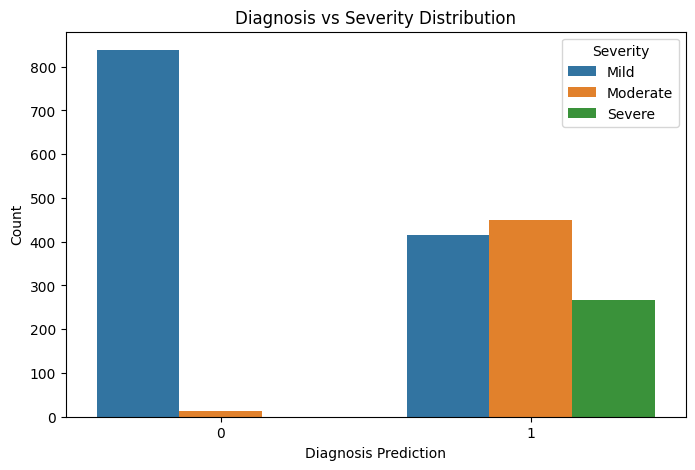

In [6]:
# Plot distribution of severity for each diagnosis
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='predicted_label', hue='predicted_severity')
plt.title('Diagnosis vs Severity Distribution')
plt.xlabel('Diagnosis Prediction')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

### Cell 6: Percentage of severity per diagnosis

In [7]:
# Calculate percentage of severity per diagnosis
cross_tab = pd.crosstab(merged_df['predicted_label'], merged_df['predicted_severity'], normalize='index') * 100
print("Percentage of severity per diagnosis:")
print(cross_tab.round(2))

Percentage of severity per diagnosis:
predicted_severity   Mild  Moderate  Severe
predicted_label                            
0                   98.36      1.64    0.00
1                   36.72     39.72   23.57


In [8]:
merged_df = pd.read_csv('../models/integration_model1_model2.csv')
merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1985 non-null   int64  
 1   predicted_label     1985 non-null   int64  
 2   actual_label        1985 non-null   int64  
 3   predicted_severity  1985 non-null   object 
 4   actual_severity     1985 non-null   object 
 5   probability_no_asd  1985 non-null   float64
 6   probability_asd     1985 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 108.7+ KB


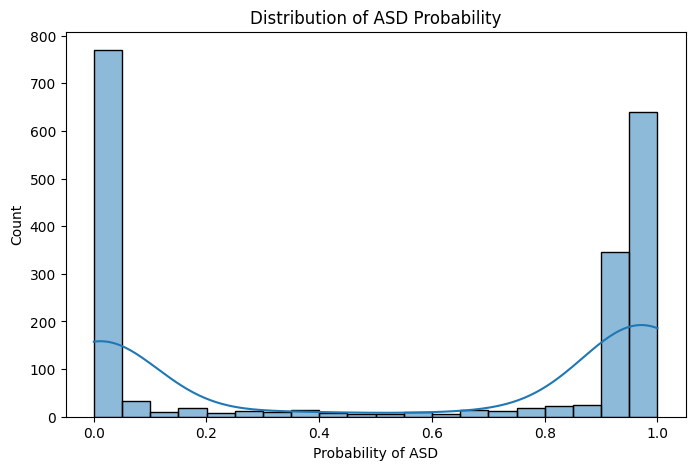

In [9]:
# Confidence distribution
plt.figure(figsize=(8,5))
sns.histplot(merged_df['probability_asd'], bins=20, kde=True)
plt.title('Distribution of ASD Probability')
plt.xlabel('Probability of ASD')
plt.ylabel('Count')
plt.show()
